<a href="https://colab.research.google.com/github/RohanRanshinge/churn-prediction/blob/master/Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Churn Prediction

## Data Ingestion

In [0]:
# importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
df_train = pd.read_csv('https://raw.githubusercontent.com/RohanRanshinge/churn-prediction/master/churn_train.csv',header=0)
#df_train.head(5)

In [0]:
df_test = pd.read_csv('https://raw.githubusercontent.com/RohanRanshinge/churn-prediction/master/churn_test.csv')
#df_test.head(5)

In [22]:
df_test.columns
df_train.columns

Index(['customerID', 'st', 'acclen', 'arcode', 'phnum', 'intplan', 'voice',
       'nummailmes', 'tdmin', 'tdcal', 'tdchar', 'temin', 'tecal', 'tecahr',
       'tnmin', 'tn cal', 'tnchar', 'timin', 'tical', 'tichar ', 'ncsc',
       'label'],
      dtype='object')

In [23]:
df_train.head(2)

,customerID,st,acclen,arcode,phnum,intplan,voice,nummailmes,tdmin,tdcal,tdchar,temin,tecal,tecahr,tnmin,tn cal,tnchar,timin,tical,tichar,ncsc,label
0,1,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False.
1,2,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.


In [24]:
df_train.loc[df_train['intplan']==' no',['intplan']] = 0
df_train.loc[df_train['intplan']==' yes',['intplan']] = 1
df_train.loc[df_train['voice']==' no',['voice']] = 0
df_train.loc[df_train['voice']==' yes',['voice']] = 1
df_train.loc[df_train['label']==' True.',['label']]=1
df_train.loc[df_train['label']==' False.',['label']]=0
df_train.head(2)

,customerID,st,acclen,arcode,phnum,intplan,voice,nummailmes,tdmin,tdcal,tdchar,temin,tecal,tecahr,tnmin,tn cal,tnchar,timin,tical,tichar,ncsc,label
0,1,KS,128,415,382-4657,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0
1,2,OH,107,415,371-7191,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,0


In [25]:
df_test.loc[df_test['intplan']==' no',['intplan']] = 0
df_test.loc[df_test['intplan']==' yes',['intplan']] = 1
df_test.loc[df_test['voice']==' no',['voice']] = 0
df_test.loc[df_test['voice']==' yes',['voice']] = 1
df_test.loc[df_test['label']==' True.',['label']]=1
df_test.loc[df_test['label']==' False.',['label']]=0
df_test.head(2)

,customerID,st,acclen,arcode,phnum,intplan,voice,nummailmes,tdmin,tdcal,tdchar,temin,tecal,tecahr,tnmin,tn cal,tnchar,timin,tical,tichar,ncsc,label
0,3334,HI,101,510,354-8815,0,0,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,10.6,3,2.86,3,0
1,3335,MT,137,510,381-7211,0,0,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,9.5,7,2.57,0,0


In [0]:
df_train.drop('st',axis=1,inplace=True)
df_train.drop('phnum',axis=1,inplace=True)

In [0]:
df_test.drop('st',axis=1,inplace=True)
df_test.drop('phnum',axis=1,inplace=True)

In [32]:
df_train.columns

Index(['customerID', 'acclen', 'arcode', 'intplan', 'voice', 'nummailmes',
       'tdmin', 'tdcal', 'tdchar', 'temin', 'tecal', 'tecahr', 'tnmin',
       'tn cal', 'tnchar', 'timin', 'tical', 'tichar ', 'ncsc', 'label'],
      dtype='object')

In [33]:
df_train.dtypes
df_test.dtypes

customerID      int64
acclen          int64
arcode          int64
intplan         int64
voice           int64
nummailmes      int64
tdmin         float64
tdcal           int64
tdchar        float64
temin         float64
tecal           int64
tecahr        float64
tnmin         float64
tn cal          int64
tnchar        float64
timin         float64
tical           int64
tichar        float64
ncsc            int64
label           int64
dtype: object

In [0]:
X_train = df_train.iloc[:,:-1]
y_train = df_train.iloc[:,-1]
X_test = df_test.iloc[:,:-1]
y_test = df_test.iloc[:,-1]

## EDA

In [35]:
df_train.columns

Index(['customerID', 'acclen', 'arcode', 'intplan', 'voice', 'nummailmes',
       'tdmin', 'tdcal', 'tdchar', 'temin', 'tecal', 'tecahr', 'tnmin',
       'tn cal', 'tnchar', 'timin', 'tical', 'tichar ', 'ncsc', 'label'],
      dtype='object')

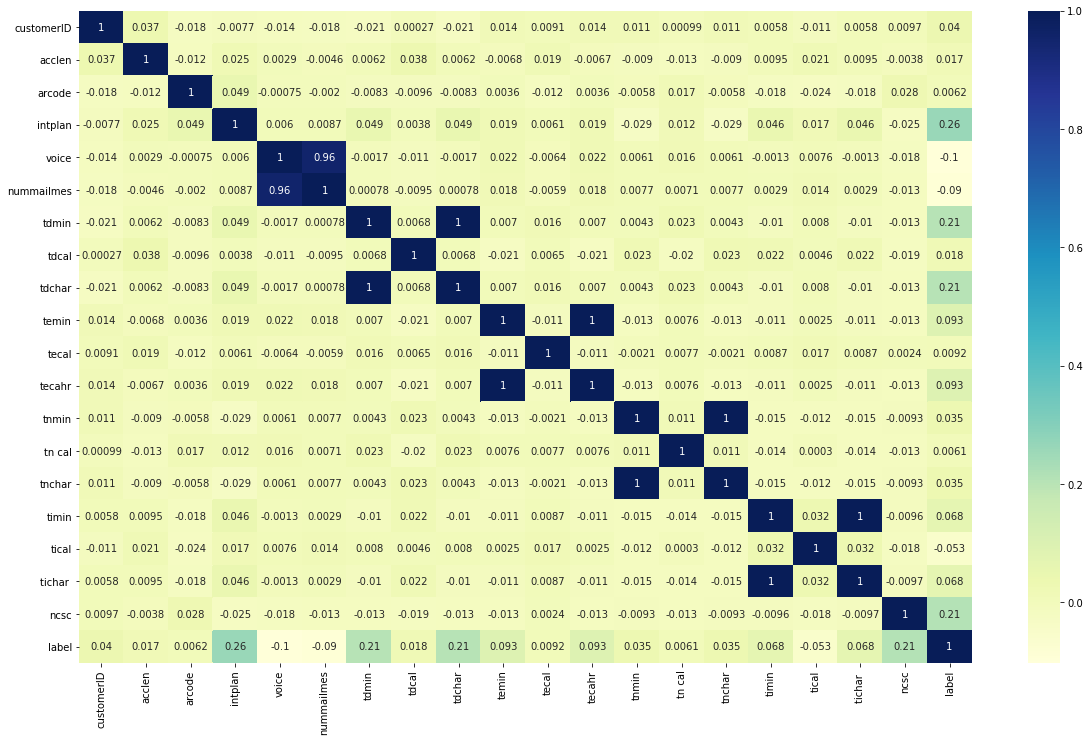

In [36]:
f, axes = plt.subplots(figsize=(20, 12))

cor = df_train.corr()
sns.heatmap(cor,annot=True,cmap = 'YlGnBu')

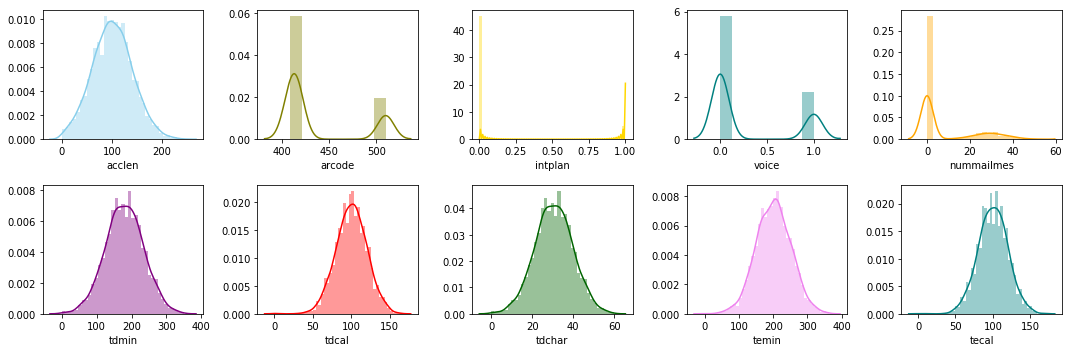

In [37]:
# plot
f, axes = plt.subplots(2, 5, figsize=(15, 5))
sns.distplot( df_train["acclen"] , color="skyblue", ax=axes[0, 0])
sns.distplot( df_train["arcode"] , color="olive", ax=axes[0, 1])
sns.distplot( df_train["intplan"] , color="gold", ax=axes[0, 2])
sns.distplot( df_train["voice"] , color="teal", ax=axes[0, 3])
sns.distplot( df_train["nummailmes"] , color="orange", ax=axes[0, 4])
sns.distplot( df_train["tdmin"] , color="purple", ax=axes[1, 0])
sns.distplot( df_train["tdcal"] , color="red",ax=axes[1, 1])
sns.distplot( df_train["tdchar"] , color="darkgreen", ax=axes[1, 2])
sns.distplot( df_train["temin"] , color="violet", ax=axes[1, 3])
sns.distplot( df_train["tecal"] , color="teal", ax=axes[1, 4])
f.tight_layout()
plt.show()

Text(0.5, 0.98, 'Cholesterol distribution: FEMALE = 0; MALE = 1')

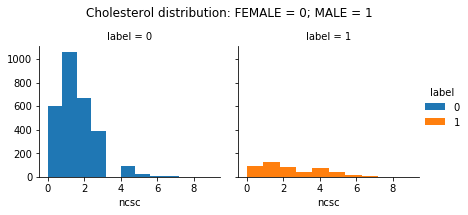

In [38]:
g = sns.FacetGrid(df_train,col='label',hue='label')
g.map(plt.hist,'ncsc').add_legend()
plt.subplots_adjust(top = 0.8)
g.fig.suptitle('Cholesterol distribution: FEMALE = 0; MALE = 1')

## Modeling

## Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
logreg = LogisticRegression()

In [41]:
logreg.fit(X_train,y_train)
prediction_log = logreg.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [42]:
logreg_accuracy = logreg.score(X_test, y_test)*100
print('Accuracy of logistic regression: ',logreg_accuracy)


Accuracy of logistic regression:  86.5626874625075


### Grid Search CV on Logistic Regression

In [0]:
import warnings
warnings.filterwarnings("ignore")

In [0]:
from sklearn.model_selection import GridSearchCV

In [45]:
param_grid = {
    'C' : np.logspace(0,4,10),
    'penalty': ['l1','l2']
}


best_model_cv = GridSearchCV(estimator=logreg, param_grid=param_grid, cv= 10)
best_model_cv.fit(X_train, y_train)
best_model_cv.best_estimator_

LogisticRegression(C=21.544346900318832, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [0]:
logreg_cv =LogisticRegression(C=21.544346900318832, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [47]:
logreg_cv.fit(X_train,y_train)


LogisticRegression(C=21.544346900318832, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [48]:
prediction_log_cv = logreg_cv.predict(X_test)
logreg_cv_accuracy = logreg_cv.score(X_test, y_test)*100
print(logreg_cv_accuracy)


86.80263947210558


## SVM

In [49]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
pred_svm=svm.predict(X_test)
svm_accuracy = svm.score(X_test,y_test)*100
print(svm_accuracy)

86.5626874625075


### GridSearch CV on SVM

In [50]:
param_grid = {
    'gamma': [0.001, 0.01, 0.1] 
}

best_svm_cv = GridSearchCV(estimator=svm, param_grid=param_grid, cv= 5)
best_svm_cv.fit(X_train, y_train)
best_svm_cv.best_estimator_

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [0]:
svm_cv = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [52]:
svm_cv.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [53]:
pred_svm_cv = svm_cv.predict(X_test)
svm_cv_accuracy = svm_cv.score(X_test, y_test)*100
print(svm_cv_accuracy)

86.5626874625075


## Random Forest Classifier

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
RFC = RandomForestClassifier()

In [56]:
RFC.fit(X_train,y_train)
pred_rfc = RFC.predict(X_test)
RFC_accuracy = RFC.score(X_test,y_test)*100
print('RFC Accuracy: ',RFC_accuracy)

RFC Accuracy:  94.72105578884224


### GridSearch CV on Random Forest Classifier

In [57]:
param_grid = {
    'n_estimators': [2,4]
}


best_rfc_cv = GridSearchCV(estimator=RFC, param_grid=param_grid, cv= 5)
best_rfc_cv.fit(X_train, y_train)
print (best_rfc_cv.best_params_)

{'n_estimators': 2}


In [0]:
rfc_cv = RandomForestClassifier(n_estimators = 4,random_state=60)

In [59]:
rfc_cv.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=4, n_jobs=None,
            oob_score=False, random_state=60, verbose=0, warm_start=False)

In [60]:
pred_rfc_cv = rfc_cv.predict(X_test)
rfc_cv_accuracy = rfc_cv.score(X_test, y_test)*100
print('RFC accuracy: ',rfc_cv_accuracy)

RFC accuracy:  94.18116376724655


## Assessing Model Performance

In [0]:
from sklearn.metrics import confusion_matrix

### Logistic Regression Confusion Matrix

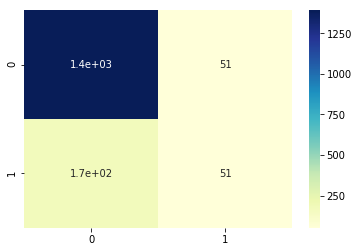

In [62]:
cm_log = confusion_matrix(y_test, prediction_log)
cm_log
sns.heatmap(cm_log, annot = True, cmap = 'YlGnBu')
plt.show()

### GridSearchCV Logistic Regression Confusion Matrix

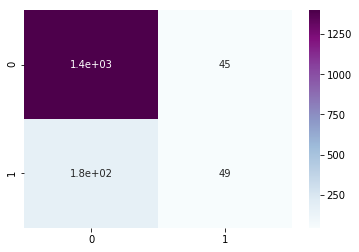

In [63]:
cm_log_cv = confusion_matrix(y_test, prediction_log_cv)
cm_log_cv
sns.heatmap(cm_log_cv, annot = True, cmap = 'BuPu')
plt.show()

### SVM Confusion Matrix

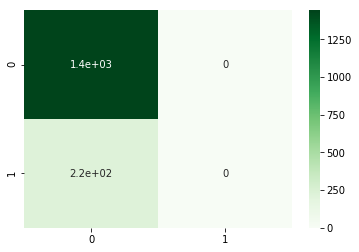

In [64]:
cm_svm = confusion_matrix(y_test, pred_svm)
cm_svm
sns.heatmap(cm_svm, annot = True, cmap = 'Greens')
plt.show()

### GridSearchCV SVM Confusion Matrix

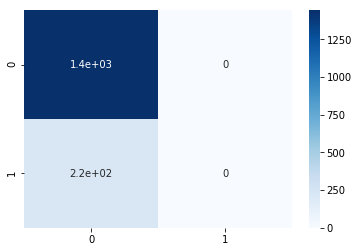

In [65]:
cm_svm_cv = confusion_matrix(y_test, pred_svm_cv)
cm_svm_cv
sns.heatmap(cm_svm_cv, annot = True, cmap = 'Blues')
plt.show()

### Random Forest Classifer Confusion Matrix

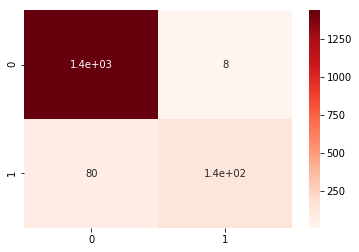

In [66]:
cm_rf = confusion_matrix(y_test, pred_rfc)
cm_rf
sns.heatmap(cm_rf, annot = True, cmap = 'Reds')
plt.show()

### GridSearchCV Random Forest Classifier Confusion Matrix

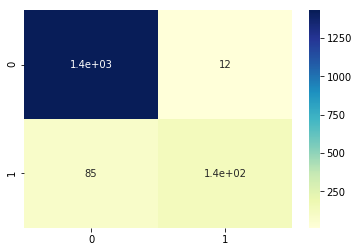

In [67]:
cm_rf_cv = confusion_matrix(y_test, pred_rfc_cv)
cm_rf_cv
sns.heatmap(cm_rf_cv, annot = True, cmap = 'YlGnBu')
plt.show()

### Comparing accuracy of all the models

In [0]:
accuracy = [logreg_accuracy,logreg_cv_accuracy,svm_accuracy,svm_cv_accuracy,RFC_accuracy,rfc_cv_accuracy]
model_names = ['Logistic Reg','GridSearchCV Logistic Reg','SVM','GridSearchCV SVM','RFC','GridSearchCV RFC']

Text(0, 0.5, 'Classification Algorithms')

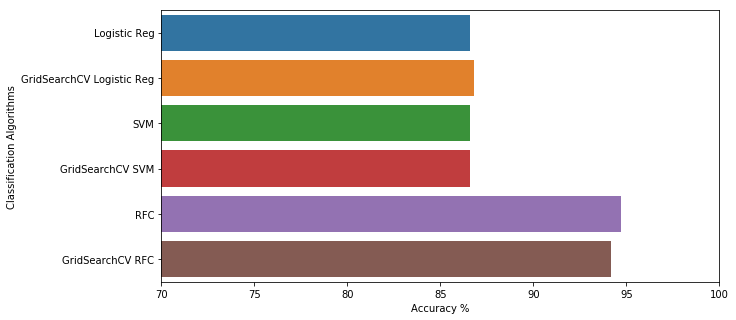

In [69]:
plt.figure(figsize=(10,5))
plt.yticks(np.arange(0,100,10))
sns.barplot(accuracy,model_names)
plt.xlim(70,100)
plt.xlabel('Accuracy %')
plt.ylabel('Classification Algorithms')

## Conclusions
1) **RFC** gives us the highest accuracy as compared to *Logistic Regression and SVM* \
2) Taking care of **false positives** is very important for the business. We do not want to predict a customer will not change when in reality he/she does churn. \
3) Having more leading indicators will give us better predictive powers and enable us to come up with even higher accuracy

